**AI ML PROJECT**

**SPAM EMAIL DETECTION**

TEAM 38 : BATCH EB-04

**RITVIK GUPTA(E19CSE138),   VANSH BANSAL(E19CSE130),  PRATHAM GUPTA(E19CSE034)** 

##Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


## Reading the top 10 emails

In [3]:
email = pd.read_csv("emails.csv")
email.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


##Number of emails in the dataset

In [4]:
len(email)

5728

##Finding missing values using isna()

In [5]:
email.isna().sum()

text    0
spam    0
dtype: int64

## Number of columns in the dataset

In [6]:
email.shape

(5728, 2)

## Reading the last 10 emails

In [7]:
email.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


## Cleaning the text

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(email)):
  e_mail = re.sub('[^a-zA-Z]', ' ', email['text'][i])
  e_mail = e_mail.split()
  ps = PorterStemmer()
  e_mail = [ps.stem(word) for word in e_mail if not word in set(stopwords.words('english'))]
  e_mail = ' '.join(e_mail)
  corpus.append(e_mail)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Creating the Bag of Words model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = email['spam']

In [11]:
len(X)

5728

In [12]:
X.shape

(5728, 25607)

In [13]:
len(y)

5728

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

### 1.GaussianNB

In [15]:
from sklearn.naive_bayes import GaussianNB
GN_classifier = GaussianNB()
GN_classifier.fit(X_train, y_train)

GaussianNB()

In [16]:
GN_score = GN_classifier.score(X_test,y_test)
GN_score

0.9607329842931938

In [17]:
# Predicting the Test set results
y_GN_pred = GN_classifier.predict(X_test)

In [18]:
y_GN_pred

array([0, 0, 1, ..., 0, 0, 1])

### 2.MultinomialNB

In [19]:
from sklearn.naive_bayes import MultinomialNB
MN_classifier = MultinomialNB()
MN_classifier.fit(X_train, y_train)

MultinomialNB()

In [20]:
MN_score = MN_classifier.score(X_test,y_test)
MN_score

0.9825479930191972

In [21]:
y_MN_pred = MN_classifier.predict(X_test)

## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
GN_cm = confusion_matrix(y_test, y_GN_pred)
print(GN_cm)

[[875  10]
 [ 35 226]]


In [23]:
from sklearn.metrics import confusion_matrix
MN_cm = confusion_matrix(y_test, y_MN_pred)
print(MN_cm)

[[870  15]
 [  5 256]]


## Comparing Both the Models

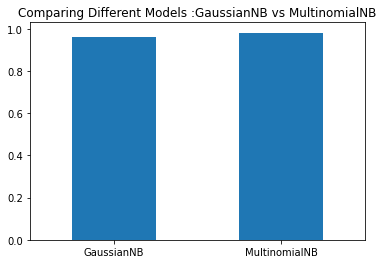

In [24]:
models = pd.DataFrame({"GaussianNB": GN_score,
                           "MultinomialNB": MN_score
                           },
                          index=[0])

models.T.plot.bar(title="Comparing Different Models :GaussianNB vs MultinomialNB",
                      legend=False)
plt.xticks(rotation=0);

**AI ML PROJECT**

**SPAM EMAIL DETECTION**

TEAM 38 : BATCH EB-04

**RITVIK GUPTA(E19CSE138),   VANSH BANSAL(E19CSE130),  PRATHAM GUPTA(E19CSE034)** 